In [1]:
H0km = 70
ΩΛ = 0.7
Ωm = 0.3
Ωk = 1 - ΩΛ - Ωm


In [2]:
import math
data = []

H0 = H0km / 3.08e19 * 60 * 60 * 24 * 365 * 1e6
H = H0
c = 1
z = 0
t = 0
x = 0
xλ = 1

while z < 10:
    t -= 1
    x += c - H * x
    xλ += c - H * xλ
    z = 1 / (xλ - x) - 1
    H = H0 * (Ωm * (1+z)**3 + ΩΛ + Ωk * (1+z)**2)**0.5

    xk = abs(Ωk)**0.5 * x * (1+z)
    if Ωk < 0:
        xx = 1/H0 * math.sin(xk * H0) / xk * x 
    elif Ωk > 0:
        xx = 1/H0 * math.sinh(xk * H0) / xk * x 
    else:
        xx = x2
    
    data.append([z, -t, xx, x * (1 + z)])


In [3]:
import cosmolopy.distance as cd
cosmo = {'omega_M_0' : Ωm, 'omega_lambda_0' : ΩΛ, 'h' : H0km/100}
cosmo = cd.set_omega_k_0(cosmo)

data2 = []

z = 0
pc2ly = 3.261564
while z < 10:
    d_C = cd.comoving_distance(z, **cosmo)  * pc2ly
    d_A = cd.angular_diameter_distance(z, **cosmo)  * pc2ly
    d_T = cd.lookback_time(z, **cosmo) / 60 / 60 / 24 / 365 / 1e6
    
    data2.append([z, d_T, d_A, d_C])
    
    z += 0.1

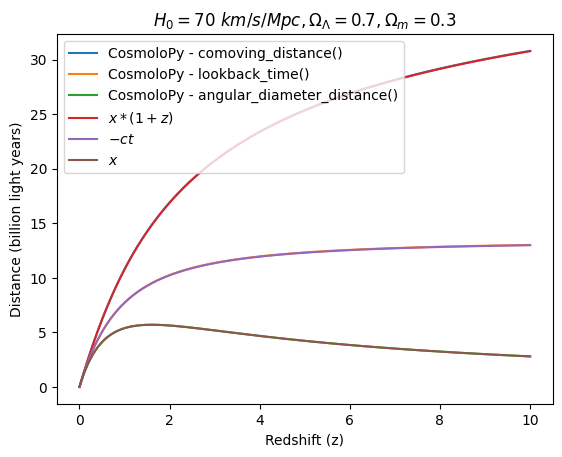

In [4]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
dataT = [row[1]/1000 for row in data] 
dataA = [row[2]/1000 for row in data] 
dataC = [row[3]/1000 for row in data] 

dataz2 = [row[0] for row in data2] 
dataT2 = [row[1]/1000 for row in data2] 
dataA2 = [row[2]/1000 for row in data2] 
dataC2 = [row[3]/1000 for row in data2] 

#plt.figure(figsize=(10,8))
    
plt.plot(dataz2, dataC2, label = "CosmoloPy - comoving_distance()")
plt.plot(dataz2, dataT2, label = "CosmoloPy - lookback_time()")
plt.plot(dataz2, dataA2, label = "CosmoloPy - angular_diameter_distance()")

plt.plot(dataz, dataC, label = "$x * (1+z)$")
plt.plot(dataz, dataT, label = "$-ct$")
plt.plot(dataz, dataA, label = "$x$")

plt.title("$H_0 = " + str(H0km) + "~km/s/Mpc, \Omega_\Lambda =" + str(ΩΛ) + ", \Omega_m = " + str(Ωm) + "$")
plt.xlabel("Redshift (z)")
plt.ylabel("Distance (billion light years)")
plt.legend()

#plt.savefig('cp4.png',  bbox_inches='tight')
plt.show()